# Multiclass Image Classification

## Imports

In [22]:
# --- Standard Libraries ---
import os
import shutil
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Scikit-learn ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, classification_report

# --- TensorFlow & Keras Core ---
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy, AUC, F1Score
from tensorflow.keras.callbacks import (
    EarlyStopping,
    ReduceLROnPlateau,
    ModelCheckpoint,
    CSVLogger,
    LearningRateScheduler
)
from tensorflow.keras.preprocessing import image_dataset_from_directory

# --- Keras Layers ---
from tensorflow.keras.layers import (
    Input,
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dense,
    Dropout,
    BatchNormalization,
    Activation,
    GlobalAveragePooling2D,
    Rescaling,
    RandomFlip,
    RandomRotation,
    RandomZoom,
    RandomContrast,
    RandomSharpness
)

# --- Keras Augmentation & Utils ---
from tensorflow.keras.layers import RandAugment
from tensorflow.keras.utils import to_categorical
from keras.layers import LeakyReLU  # Optional (if you're using it)
from keras.regularizers import l2

# --- Keras Applications ---
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input

# --- Custom Modules ---
import library
from library import vis_images, model_summary, check_sizes


## Metadata Import version 1

In [ ]:
# # Caminho base onde estão as pastas com imagens
# base_image_dir = 'C:/Users/luisp/OneDrive/Mestrado/1ano/2sem/Deep Learning (DL)/Project/rare_species 1'

# # Criar coluna com caminho absoluto para cada imagem
# metadata['absolute_path'] = metadata['file_path'].apply(lambda x: os.path.join(base_image_dir, x))

# # Verificar se o ficheiro existe no disco
# metadata['exists_on_disk'] = metadata['absolute_path'].apply(os.path.exists)

# # Mostrar quantos existem e quantos faltam
# total_in_metadata = len(metadata)
# existing_on_disk = metadata['exists_on_disk'].sum()
# real_images_on_disk = sum(len(files) for _, _, files in os.walk(base_image_dir))

# print(f"Total de imagens no metadata: {total_in_metadata}")
# print(f"Total de imagens que existem no disco: {existing_on_disk}")
# print(f"Total real de ficheiros de imagem no disco: {real_images_on_disk}")

# # Mostrar exemplos de imagens em falta
# print("\nExemplos de imagens em falta:")
# print(metadata[~metadata['exists_on_disk']][['file_path']].head())

# # Remover entradas com ficheiros em falta
# metadata_clean = metadata[metadata['exists_on_disk']].drop(columns=['exists_on_disk'])

# # Guardar novo ficheiro limpo
# metadata_clean.to_csv("C:/Users/luisp/OneDrive/Mestrado/1ano/2sem/Deep Learning (DL)/Project/rare_species 1/metadata_clean.csv", index=False)

# print("\n✅ metadata_clean.csv guardado com sucesso — apenas com imagens existentes.")

## Metadata Import 2

Everything is comented because this split was already done in our pcs

#### Inês

In [35]:
metadata_path=r"C:\Users\User\Desktop\deeplearning\metadata.csv"

#### Rodrigo

In [36]:
metadata_path=r"C:\Users\rodri\Desktop\Nova IMS\1º Ano\2nd Semester\Deep Learning\Project\rare_species 1\metadata.csv"

In [37]:
metadata = pd.read_csv(metadata_path)

In [38]:
metadata.head()

,rare_species_id,eol_content_id,eol_page_id,kingdom,phylum,family,file_path
0,75fd91cb-2881-41cd-88e6-de451e8b60e2,12853737,449393,animalia,mollusca,unionidae,mollusca_unionidae/12853737_449393_eol-full-si...
1,28c508bc-63ff-4e60-9c8f-1934367e1528,20969394,793083,animalia,chordata,geoemydidae,chordata_geoemydidae/20969394_793083_eol-full-...
2,00372441-588c-4af8-9665-29bee20822c0,28895411,319982,animalia,chordata,cryptobranchidae,chordata_cryptobranchidae/28895411_319982_eol-...
3,29cc6040-6af2-49ee-86ec-ab7d89793828,29658536,45510188,animalia,chordata,turdidae,chordata_turdidae/29658536_45510188_eol-full-s...
4,94004bff-3a33-4758-8125-bf72e6e57eab,21252576,7250886,animalia,chordata,indriidae,chordata_indriidae/21252576_7250886_eol-full-s...


In [39]:
metadata.shape

(11983, 7)

In [60]:
# # Images directory
# ##### Luis
# image_dir_luis = "C:/Users/luisp/OneDrive/Mestrado/1ano/2sem/Deep Learning (DL)/Project/rare_species 1"
# ##### Pedro

# ##### Rodrigo
# image_dir_Rodrigo = r"C:\Users\rodri\Desktop\Nova IMS\1º Ano\2nd Semester\Deep Learning\Project\rare_species 1"

# ##### Rafael

# ##### Inês


# # Caminho base
# base_image_dir = image_dir_Rodrigo

In [61]:
# # Criar coluna de caminhos absolutos
# metadata['absolute_path'] = metadata['file_path'].apply(lambda x: os.path.join(base_image_dir, x))

# # Verificar se o ficheiro existe no disco
# metadata['exists'] = metadata['absolute_path'].apply(os.path.exists)

# # Contar inválidos (ficheiros que não existem)
# invalid_paths = (~metadata['exists']).sum()

# # Contar caminhos duplicados
# duplicate_paths = metadata['file_path'].duplicated().sum()

# # Mostrar info antes da limpeza
# print(f"- Invalid paths: {invalid_paths}")
# print(f"- Duplicated paths: {duplicate_paths}")
# print("\nRemoving the invalid file entries....")
# print("All set!\n")

# # Limpeza
# metadata = metadata[metadata['exists']].drop(columns=['exists'])
# metadata = metadata.drop_duplicates(subset='file_path', keep='first')

# # Estatísticas pós-limpeza
# real_images_on_disk = sum(len(files) for _, _, files in os.walk(base_image_dir))
# total_paths_final = len(metadata)


# # Mensagem final
# print(f"- Total number of entries in metadata: {total_paths_final}")

In [42]:
metadata['family'] = metadata['family'].astype(str)  # Ensure it's a string
metadata['file_path'] = metadata['file_path'].astype(str)  # Ensure path is string

In [ ]:
#Rodrigo
dataset_directory = r"C:\Users\rodri\Desktop\rare_species 1"

In [ ]:
# Define output directories
output_base = r"C:\Users\rodri\Desktop\rare_species 1\dataset_split"
os.makedirs(output_base, exist_ok=True)
for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(output_base, split), exist_ok=True)

In [45]:
# Stratified split at image level
from sklearn.model_selection import train_test_split

train_files, temp_files = train_test_split(metadata, test_size=0.3, stratify=metadata['family'], random_state=42)
val_files, test_files = train_test_split(temp_files, test_size=0.5, stratify=temp_files['family'], random_state=42)

In [46]:
def move_files(file_subset, split_name):
    for _, row in file_subset.iterrows():
        src_path = os.path.join(dataset_directory, row['file_path'])  # Construct full path
        dst_path = os.path.join(output_base, split_name, row['file_path'])
        os.makedirs(os.path.dirname(dst_path), exist_ok=True)  # Ensure folder structure
        if os.path.exists(src_path):
            shutil.copy2(src_path, dst_path)
        else:
            print(f"Warning: {src_path} not found.")

# Move images to respective folders
move_files(train_files, 'train')
move_files(val_files, 'val')
move_files(test_files, 'test')

print("Dataset split completed!")

Dataset split completed!


## Localizing Data

#### Pedro

In [47]:
train_path = r"/Users/pedrosantos/Documents 2/Deep Learning/Projeto/rare_species 1/dataset_split/train"
valid_path = r"/Users/pedrosantos/Documents 2/Deep Learning/Projeto/rare_species 1/dataset_split/val"
test_path = r"/Users/pedrosantos/Documents 2/Deep Learning/Projeto/rare_species 1/dataset_split/test"

#### Inês

In [12]:
train_path = r"C:\Users\User\Desktop\deeplearning\dataset_split\train"
valid_path = r"C:\Users\User\Desktop\deeplearning\dataset_split\val"
test_path = r"C:\Users\User\Desktop\deeplearning\dataset_split\test"

#### Rodrigo

In [68]:
train_path = r"C:\Users\rodri\Desktop\rare_species 1\dataset_split\train"
valid_path = r"C:\Users\rodri\Desktop\rare_species 1\dataset_split\val"
test_path = r"C:\Users\rodri\Desktop\rare_species 1\dataset_split\test"

## Global Variables

In [69]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

## Data Loading

In [70]:
train = keras.utils.image_dataset_from_directory(
    directory = train_path,
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(224,224),
    color_mode="rgb",
    shuffle=True,
    interpolation = "bilinear"
)

validation = keras.utils.image_dataset_from_directory(
    directory = valid_path,
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(224,224),
    color_mode="rgb",
    shuffle=False,
    interpolation = "bilinear"
)

test = keras.utils.image_dataset_from_directory(
    directory = test_path,
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(224,224),
    color_mode="rgb",
    shuffle=False,
    interpolation = "bilinear"
)

Found 8388 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
Found 1798 files belonging to 202 classes.


## Visualizing Images

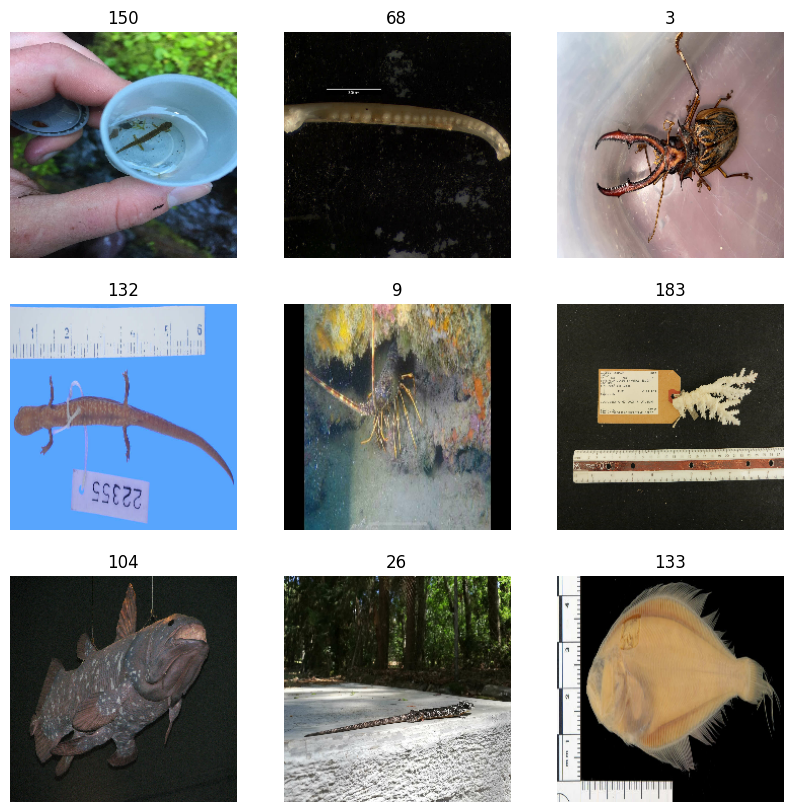

In [15]:
vis_images(train)

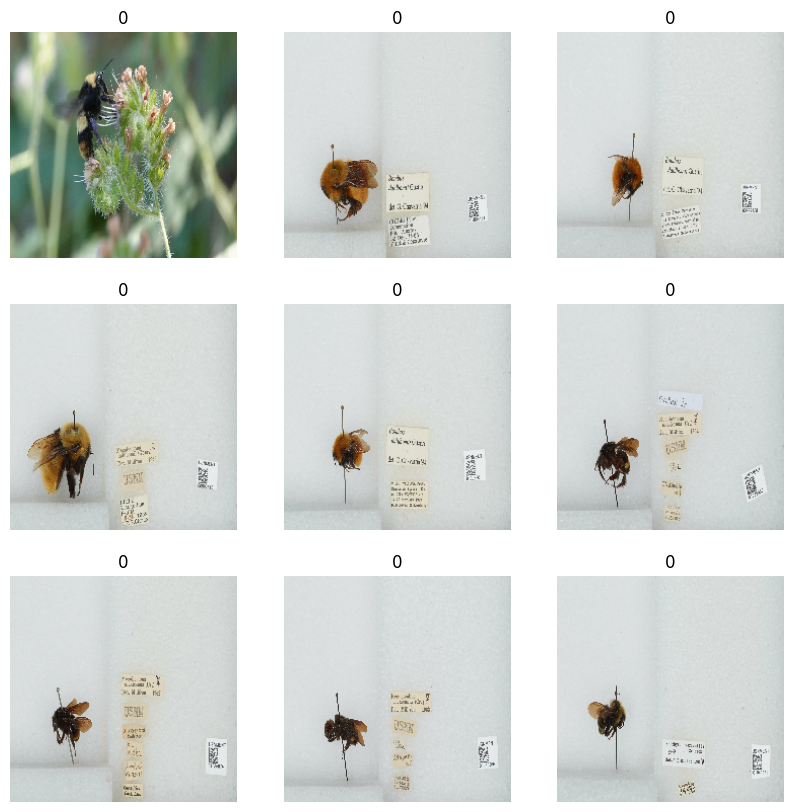

In [16]:
vis_images(validation)

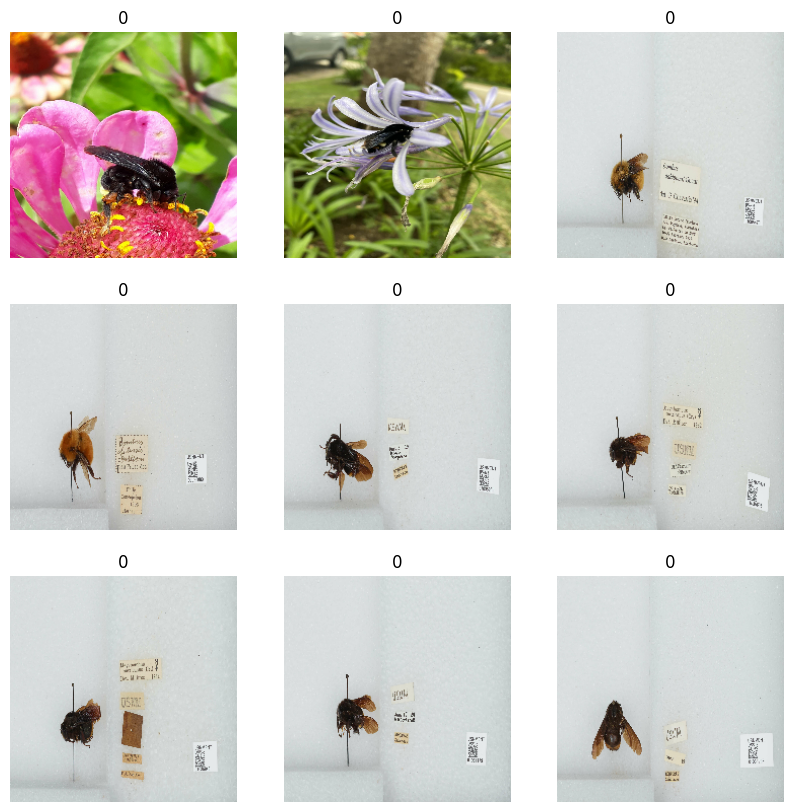

In [17]:
vis_images(test)

## Resizing

### Checking sizes

In [16]:
check_sizes(train)

Image Batch Shape: (32, 224, 224, 3)
Min Pixel Value: 0.0
Max Pixel Value: 255.0
Label Batch Shape: (32, 202)


2025-04-15 17:11:59.335002: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [17]:
check_sizes(validation)

Image Batch Shape: (32, 224, 224, 3)
Min Pixel Value: 0.0
Max Pixel Value: 255.0
Label Batch Shape: (32, 202)


2025-04-15 17:12:07.317661: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [18]:
check_sizes(test)

Image Batch Shape: (32, 224, 224, 3)
Min Pixel Value: 0.0
Max Pixel Value: 255.0
Label Batch Shape: (32, 202)


### Aplying Resizing

In [21]:
normalization = Rescaling(1./255)

train = train.map(lambda x,y: (normalization(x), y))
validation = validation.map(lambda x,y: (normalization(x), y))
test = test.map(lambda x,y: (normalization(x), y))

In [ ]:
### Checking RGB Pixel
for images, labels in train.take(1):
    print("Min Pixel Value:", np.min(images.numpy()))
    print("Min Pixel Value:", np.max(images.numpy()))


Min Pixel Value: 0.0
Min Pixel Value: 1.0


In [23]:
### Checking RGB Pixel 
for images, labels in validation.take(1):
    print("Min Pixel Value:", np.min(images.numpy()))
    print("Min Pixel Value:", np.max(images.numpy()))

Min Pixel Value: 0.0
Min Pixel Value: 1.0


In [ ]:
### Checking RGB
for images, labels in test.take(1):
    print("Min Pixel Value:", np.min(images.numpy()))
    print("Min Pixel Value:", np.max(images.numpy()))

Min Pixel Value: 0.0
Min Pixel Value: 1.0


## Initial Tests

### Setting up tensorboard

In [ ]:
tb_logs = r"/Users/pedrosantos/Documents 2/Deep Learning/Projeto"
log_directory = tb_logs + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

### Creating a model

In [ ]:
## Defining the main class which will be called and will contain our model's parameters.
## It inherits from keras.Model class

## Why

class CNN1(Model):

    def __init__(self, activation = "relu"):
        # Calling super().__init__ method refers to the parent class Model.
        # Why is this important? - register the model, it properly initializes the Keras Model class
        # allowing TF to manage layers, forward propagation, and model metadata correctly.

        # Allows Model Methods to Work --> Methods like .fit(), .predict(), and .save(), depend
        # on Model being initialized properly.
        super().__init__()


       #### BLOCK 1
        self.conv1_l = Conv2D(filters=3*64, kernel_size=(3,3), activation=activation, name="conv1_l")
        self.batch1 = BatchNormalization()
        self.conv1_r = Conv2D(filters=3*64, kernel_size=(3,3), activation=activation, name="conv1_r")
        self.batch2 = BatchNormalization()
        self.maxpool1 = MaxPooling2D(pool_size=(2,2), padding="same", name="maxpool1")

        #### BLOCK 2
        self.conv2_l = Conv2D(filters=3*64, kernel_size=(3,3), activation=activation, name="conv2_l")
        self.batch3 = BatchNormalization()
        self.conv2_r = Conv2D(filters=3*64, kernel_size=(3,3), activation=activation, name="conv2_r")
        self.batch4 = BatchNormalization()
        self.maxpool2 = MaxPooling2D(pool_size=(2,2), padding="same", name="maxpool2")

        #### FLATTEN AND DENSE
        self.flatten_layer = Flatten()
        self.dropout_layer = Dropout(rate=0.5)
        self.batch5 = BatchNormalization()
        self.dense_layer = Dense(units=202, activation="softmax", name="classification")

    def call(self, inputs):
        x = inputs

        # BLOCK 1
        x_l = self.conv1_l(x)
        x_l = self.batch1(x_l)
        x_r = self.conv1_r(x)
        x_r = self.batch2(x_r)
        x = add(x_l,x_r)  
        x = self.maxpool1(x)

        # BLOCK 2
        x_l2 = self.conv2_l(x)
        x_l2 = self.batch3(x_l2)
        x_r2 = self.conv2_r(x)
        x_r2 = self.batch4(x_r2)
        x = add(x_l2,x_r2)
        x = self.maxpool2(x)

        x = self.flatten_layer(x)
        x = self.dropout_layer(x)
        x = self.batch5(x)
        x = self.dense_layer(x)

        return x

c:\Users\User\anaconda3\envs\dl\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Callbacks

In [ ]:
my_callbacks = [
    keras.callbacks.TensorBoard(log_dir=log_directory),
    keras.callbacks.ModelCheckpoint(
        filepath = r"/Users/pedrosantos/Documents 2/Deep Learning/Projeto.weights.h5",
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
        verbose=1
    ),
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=5,
        restore_best_weights = True
    ),
#     keras.callbacks.ReduceLROnPlateau(
#         monitor="val_loss",
#         factor = 0.2,
#         mode="auto",
#         patience=5,
#         verbose=1,
#         min_lr = 0.000001
#     )
 ]

### Model Summary

In [ ]:
model = CNN1()
inputs = Input(shape=(224,224,3))
_ = model.call(inputs)
model.summary()

Notes:<br>
- Infeasible to run this model, taking more than 10+ hours to run 4 epochs.<br>
- It is clear than while trying both sides of the spectrum, neither a simple model, which trais fast will achieve decent results, nor a very complex one which might have the possibility to achieve the kind of accuracy we aim for, but it is just far too much time to spend, making us unable to run several experiments.<br>
- For these reasos, we conclude that we should probably aim for a Transfer Learning approach, using model's pre-trained weights, and tweaking some architecture details as well as experimenting with Data Augmentation might be the best approach forward.

# Transfer Learning

## 1. InceptionResNet

In [ ]:
from keras.applications import InceptionResNetV2

#### 1. First Things First: -> Gather Sampled Data to Proceed with Tests. 
- More efficient time wise and key to get a gauge on performance. To check if it's worth testing or not.

In [ ]:
sample_train = (
    train.unbatch().take(1500).repeat().batch(8)
)

sample_val = (
    validation.unbatch().take(500).repeat().batch(8)
)

In [ ]:
class InRes_No_Aug_No_Reg(Model):
    def __init__(self):
        super().__init__()
        self.n_classes = 202
        # self.augmentation_l = Sequential([
        #     RandomFlip("horizontal"),
        #     RandomRotation(0.4),
        #     RandomZoom(0.2),
        #     RandomContrast(0.25, value_range=(0,1)),
        #     RandomSharpness(0.4, value_range=(0,1)),
        #     RandomSaturation(0.3, value_range=(0,1))
        # ])
        self.pretrained_model = InceptionResNetV2(include_top=False)
        self.pretrained_model.trainable = False 

        self.flatten = Flatten()
        #self.dropout = Dropout(0.5) 
        self.dense = Dense(self.n_classes, activation="softmax") #kernel_regularizer=l2(0.01))

    def call(self, inputs, training=False):
        #x = self.augmentation_l(inputs, training=training)
        x = inputs
        x = self.pretrained_model(x)
        x = self.flatten(x)
        #x = self.dropout(x, training=training)
        return self.dense(x)

In [ ]:
model1 = InRes_No_Aug_No_Reg()
model_summary(InRes_No_Aug_No_Reg)

<hr>

#### 1st Test With Sampled Data

In [ ]:
model1.compile(RMSprop(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy", "AUC", F1Score(average="macro")])

test1_inres_no_aug = model1.fit(
    sample_train,
    validation_data=sample_val,
    epochs=25,
    steps_per_epoch = 1500 // 8,
    validation_steps = 500 // 8,
    callbacks=my_callbacks,
    verbose=2
)

#### Observations:
- Learning far too quick -> Solution: Reduce LR.
- Generalizability: Model has trouble generalizing well to the validation set. In the sense that, it overfits quickly to the training set (also due to LR).
    - Solution: Data Augmentation will certainly help. Not only in terms of generalization but most likely also in terms of performance.
- Dropout & L2/L1 Regularization: Could help with problem mentioned previously.

<hr>

### Building a General Purpose Model to Allow for Reusability and Customization: -- Secalhar incluir isto na Library

In [ ]:
class InResCustom(Model):
    def __init__(
        self,
        n_classes=202,
        use_augmentation=False,
        dropout_rate=None,
        regularizer=None,
        train_base=False,
        input_shape=(224, 224, 3),
        custom_aug_layers=None
    ):
        super().__init__()
        self.n_classes = n_classes

        ####### AUGMENTATION
        if use_augmentation:
            if custom_aug_layers is not None:
                self.augmentation = custom_aug_layers
            else:
                self.augmentation = Sequential([
                    RandomFlip("horizontal"),
                    RandomRotation(0.4),
                    RandomZoom(0.2),
                    RandomContrast(0.25, value_range=(0,1)),
                    #RandomSharpness(0.25, value_range=(0,1)),
                    #RandomSaturation(0.2, value_range=(0,1))
                ])
        else:
            self.augmentation = None

        ######## PRETRAINED BASE
        self.pretrained_model = InceptionResNetV2(
            include_top=False,
            input_shape=input_shape
        )
        self.pretrained_model.trainable = train_base

        ######### FLATTEN AND DENSE
        self.flatten = Flatten()
        self.dropout = Dropout(dropout_rate) if dropout_rate else None
        self.dense = Dense(n_classes, activation="softmax", kernel_regularizer=regularizer)

    ######### CALL METHOD
    def call(self, inputs, training=False):
        x = self.augmentation(inputs, training=training) if self.augmentation else inputs
        x = self.pretrained_model(x)
        x = self.flatten(x)
        if self.dropout:
            x = self.dropout(x, training=training)
        return self.dense(x)

In [ ]:
model_with_aug = InResCustom(
    use_augmentation=True,
    dropout_rate=0.5,
    regularizer=None,
    train_base=False
)

model_summary(InResCustom)
model_with_aug.compile(
    optimizer=RMSprop(learning_rate=0.00001),
    loss="categorical_crossentropy",
    metrics=["accuracy", "AUC", F1Score(average="macro")]
)

In [ ]:
test2_inres_minor_aug = model_with_aug.fit(
    sample_train,
    validation_data=sample_val,
    epochs=25,
    steps_per_epoch = 1500 // 8,
    validation_steps = 500 // 8,
    callbacks=my_callbacks,
    verbose=2
)

#### Observations:
- Reduce LR & D.A helped considerably in performance and generalizatiob. Yet, model underfits the data and cant quite generalize as well as we want. 
- A Key Point to this may be due to the fact that we are training on a sampled dataset with limited data. Next steps should include full dataset and a robust approach to D.A if early signs show bad generalization.

<hr>

#### Full Dataset -> Test Run with same D.A on entire dataset

In [ ]:
### Grabbing Pretrained Weights
model_with_aug.load_weights(r"/Users/pedrosantos/Documents 2/Deep Learning/Projeto.weights.h5")

model_with_aug.compile(
    optimizer=RMSprop(learning_rate=0.00001),
    loss="categorical_crossentropy",
    metrics=["accuracy", "AUC", F1Score(average="macro")]
)

test3_inres_fulldataset_minor_aug = model_with_aug.fit(
    train,
    validation_data=validation,
    epochs=50,
    callbacks=my_callbacks,
    verbose=2
)

<hr>

#### Fine-Tuning

In [ ]:
custom_aug = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.4),
    RandomZoom(0.2),
    RandomContrast(0.25, value_range=(0,1)),
    RandomSharpness(0.15, value_range=(0,1)),
    RandomSaturation(0.1, value_range=(0,1))
    ])

In [ ]:
model_with_aug = InResCustom(
    use_augmentation=True,
    dropout_rate=0.5,
    regularizer=None,
    custom_aug_layers=custom_aug,
    train_base=False
)

_ = model_with_aug(tf.keras.Input(shape=(224, 224, 3)))


model_with_aug.load_weights("/Users/pedrosantos/Documents 2/Deep Learning/Projeto.weights.h5")

for layer in model_with_aug.pretrained_model.layers[-200:]:
    layer.trainable = True


model_with_aug.compile(
    optimizer=RMSprop(learning_rate=0.000001),
    loss="categorical_crossentropy",
    metrics=["accuracy", "AUC", F1Score(average="macro")]
)

In [ ]:
fine_tuned = model_with_aug.fit(
    train,
    validation_data=validation,
    epochs=15,  
    callbacks=my_callbacks,
    verbose=2
)

<hr>

<a class="anchor">

# DenseNet121

<a class="anchor">

Data Loading for DenseNet121

In [ ]:
train_densenet121 = keras.utils.image_dataset_from_directory(
    directory = train_path,     # train directory path  
    labels="inferred",          # 
    label_mode="categorical",   # One-hot encoding
    batch_size=32,              # CPU Oriented
    image_size=(224,224),
    color_mode="rgb",
    shuffle=True,
    interpolation = "bilinear", # usar tambem "bicubic"
    seed = 42
)

val_densenet121 = keras.utils.image_dataset_from_directory(
    directory = valid_path,
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(224,224),
    color_mode="rgb",
    shuffle=False,
    interpolation = "bilinear" # usar tambem "bicubic"
)

test_densenet121 = keras.utils.image_dataset_from_directory(
    directory = test_path,
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(224,224),
    color_mode="rgb",
    shuffle=False,
    interpolation = "bilinear" # usar tambem "bicubic"
)

<a class="anchor">

#### Resizing

<a class="anchor">

##### Checking sizes

In [ ]:
for images, labels in train_densenet121.take(1):
    print("Image Batch Shape:", images.shape)
    print("Min Pixel Value:", np.min(images.numpy()))
    print("Max Pixel Value:", np.max(images.numpy()))

Image Batch Shape: (32, 224, 224, 3)
Min Pixel Value: 0.0
Max Pixel Value: 255.0


In [ ]:
for images, labels in val_densenet121.take(1):
    print("Image Batch Shape:", images.shape)
    print("Min Pixel Value:", np.min(images.numpy()))
    print("Max Pixel Value:", np.max(images.numpy()))

Image Batch Shape: (32, 224, 224, 3)
Min Pixel Value: 0.0
Max Pixel Value: 255.0


In [ ]:
for images, labels in test_densenet121.take(1):
    print("Image Batch Shape:", images.shape)
    print("Min Pixel Value:", np.min(images.numpy()))
    print("Max Pixel Value:", np.max(images.numpy()))

Image Batch Shape: (32, 224, 224, 3)
Min Pixel Value: 0.0
Max Pixel Value: 255.0


<a class="anchor">

##### Aplying Normalization / Preprocess_input

In [ ]:
train_densenet121 = train_densenet121.map(lambda x,y: (preprocess_input(x), y))
val_densenet121 = val_densenet121.map(lambda x,y: (preprocess_input(x), y))
test_densenet121 = test_densenet121.map(lambda x,y: (preprocess_input(x), y))

In [ ]:
# Checking RGB Pixel
for images, labels in train_densenet121.take(1):
    print("Min Pixel Value:", np.min(images.numpy()))
    print("Max Pixel Value:", np.max(images.numpy()))

Min Pixel Value: -2.117904
Max Pixel Value: 2.64


In [ ]:
### Checking RGB Pixel 
for images, labels in val_densenet121.take(1):
    print("Min Pixel Value:", np.min(images.numpy()))
    print("Max Pixel Value:", np.max(images.numpy()))

Min Pixel Value: -2.117904
Max Pixel Value: 2.64


In [ ]:
### Checking RGB
for images, labels in test_densenet121.take(1):
    print("Min Pixel Value:", np.min(images.numpy()))
    print("Max Pixel Value:", np.max(images.numpy()))

Min Pixel Value: -2.117904
Max Pixel Value: 2.64


<a class="anchor">

Autotune

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train = train_densenet121.prefetch(AUTOTUNE)
validation = val_densenet121.prefetch(AUTOTUNE)
test = test_densenet121.prefetch(AUTOTUNE)

<a class="anchor">

Data Augmentation

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
])

In [ ]:
# data_augmentation = tf.keras.Sequential([
#     # Flip horizontal (útil para simetria)
#     tf.keras.layers.RandomFlip("horizontal"),

#     # Pequenas rotações (10%)
#     tf.keras.layers.RandomRotation(factor=0.1),

#     # Zoom in e out (até ±20%)
#     tf.keras.layers.RandomZoom(height_factor=(-0.2, 0.2), width_factor=(-0.2, 0.2)),

#     # Translação (mover imagem)
#     tf.keras.layers.RandomTranslation(height_factor=0.1, width_factor=0.1),

#     # Variações de brilho e contraste
#     tf.keras.layers.RandomBrightness(factor=0.1),
#     tf.keras.layers.RandomContrast(factor=0.1),

#     # Adição de ruído (simula imagens imperfeitas)
#     tf.keras.layers.Lambda(lambda x: x + tf.random.normal(tf.shape(x), mean=0.0, stddev=0.03)),

#     # Normalização com preprocess_input (para DenseNet121)
#     tf.keras.layers.Lambda(lambda x: tf.keras.applications.densenet.preprocess_input(x))
# ])


# Função que aplica (sem recriar)
def augment(x, y):
    return data_augmentation(x), y

# Aplicar no dataset
train_densenet121 = train_densenet121.map(augment)

<a class="anchor">

Callbacks

In [ ]:
# Callbacks comuns
callbacks = [
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6),
    ModelCheckpoint("best.keras", save_best_only=True)
]

<a class="anchor">

Build the model: Baseline

In [ ]:
# Número de classes (contadas a partir do dataset one-hot)
NUM_CLASSES = train_densenet121.element_spec[1].shape[-1]

In [ ]:
def create_densenet121_model(input_shape=(224, 224, 3), num_classes=NUM_CLASSES):
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.0005),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model, base_model

In [ ]:
# Baseline with Data Augmentation
baseline_model_with_aug, base_model = create_densenet121_model()

callbacks[2] = ModelCheckpoint("best_densenet121_baseline_aug.keras", save_best_only=True)

history_baseline_model_with_aug = baseline_model_with_aug.fit(
    train_densenet121,
    validation_data=val_densenet121,
    epochs=60,
    callbacks=callbacks
)

Epoch 1/60
262/262 ━━━━━━━━━━━━━━━━━━━━ 236s 867ms/step - accuracy: 0.0456 - loss: 5.5905 - val_accuracy: 0.2561 - val_loss: 3.5189 - learning_rate: 5.0000e-04
Epoch 2/60
262/262 ━━━━━━━━━━━━━━━━━━━━ 221s 841ms/step - accuracy: 0.1999 - loss: 3.7626 - val_accuracy: 0.3906 - val_loss: 2.6929 - learning_rate: 5.0000e-04
Epoch 3/60
262/262 ━━━━━━━━━━━━━━━━━━━━ 219s 834ms/step - accuracy: 0.3261 - loss: 2.9536 - val_accuracy: 0.4810 - val_loss: 2.2792 - learning_rate: 5.0000e-04
Epoch 4/60
262/262 ━━━━━━━━━━━━━━━━━━━━ 233s 886ms/step - accuracy: 0.3934 - loss: 2.5577 - val_accuracy: 0.5206 - val_loss: 2.0351 - learning_rate: 5.0000e-04
Epoch 5/60
262/262 ━━━━━━━━━━━━━━━━━━━━ 266s 1s/step - accuracy: 0.4520 - loss: 2.2622 - val_accuracy: 0.5558 - val_loss: 1.8881 - learning_rate: 5.0000e-04
Epoch 6/60
262/262 ━━━━━━━━━━━━━━━━━━━━ 244s 925ms/step - accuracy: 0.4975 - loss: 2.0406 - val_accuracy: 0.5742 - val_loss: 1.7819 - learning_rate: 5.0000e-04
Epoch 7/60
262/262 ━━━━━━━━━━━━━━━━━━━━ 221

In [ ]:
# Salvar modelos baseline antes de fine-tuning
baseline_model_with_aug.save("baseline_model_with_aug.keras")

<a class="anchor">

Fine-Tuning

In [ ]:
def fine_tune_model(model, base_model, fine_tune_at=50, lr=1e-5):
    base_model.trainable = True
    for layer in base_model.layers[:-fine_tune_at]:
        layer.trainable = False

    model.compile(optimizer=Adam(learning_rate=lr),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
# Corrigir callback
callbacks[2] = ModelCheckpoint("best_densenet_finetuned_aug.keras", save_best_only=True)

# Fine-tune (descongela últimas layers do base_model)
finetuned_model_with_aug = fine_tune_model(baseline_model_with_aug, base_model)

# Continuar o treino com fine-tuning
history_finetuned_model_with_aug = finetuned_model_with_aug.fit(
    train_densenet121,
    validation_data=val_densenet121,
    epochs=60,
    callbacks=callbacks
)

Epoch 1/60
262/262 ━━━━━━━━━━━━━━━━━━━━ 251s 912ms/step - accuracy: 0.6172 - loss: 1.3503 - val_accuracy: 0.6613 - val_loss: 1.4192 - learning_rate: 1.0000e-05
Epoch 2/60
262/262 ━━━━━━━━━━━━━━━━━━━━ 231s 878ms/step - accuracy: 0.6390 - loss: 1.2965 - val_accuracy: 0.6641 - val_loss: 1.4154 - learning_rate: 1.0000e-05
Epoch 3/60
262/262 ━━━━━━━━━━━━━━━━━━━━ 236s 897ms/step - accuracy: 0.6443 - loss: 1.2883 - val_accuracy: 0.6685 - val_loss: 1.3993 - learning_rate: 1.0000e-05
Epoch 4/60
262/262 ━━━━━━━━━━━━━━━━━━━━ 234s 890ms/step - accuracy: 0.6569 - loss: 1.2492 - val_accuracy: 0.6708 - val_loss: 1.3881 - learning_rate: 1.0000e-05
Epoch 5/60
262/262 ━━━━━━━━━━━━━━━━━━━━ 238s 904ms/step - accuracy: 0.6563 - loss: 1.2379 - val_accuracy: 0.6735 - val_loss: 1.3784 - learning_rate: 1.0000e-05
Epoch 6/60
262/262 ━━━━━━━━━━━━━━━━━━━━ 236s 896ms/step - accuracy: 0.6700 - loss: 1.2063 - val_accuracy: 0.6763 - val_loss: 1.3702 - learning_rate: 1.0000e-05
Epoch 7/60
262/262 ━━━━━━━━━━━━━━━━━━━━ 

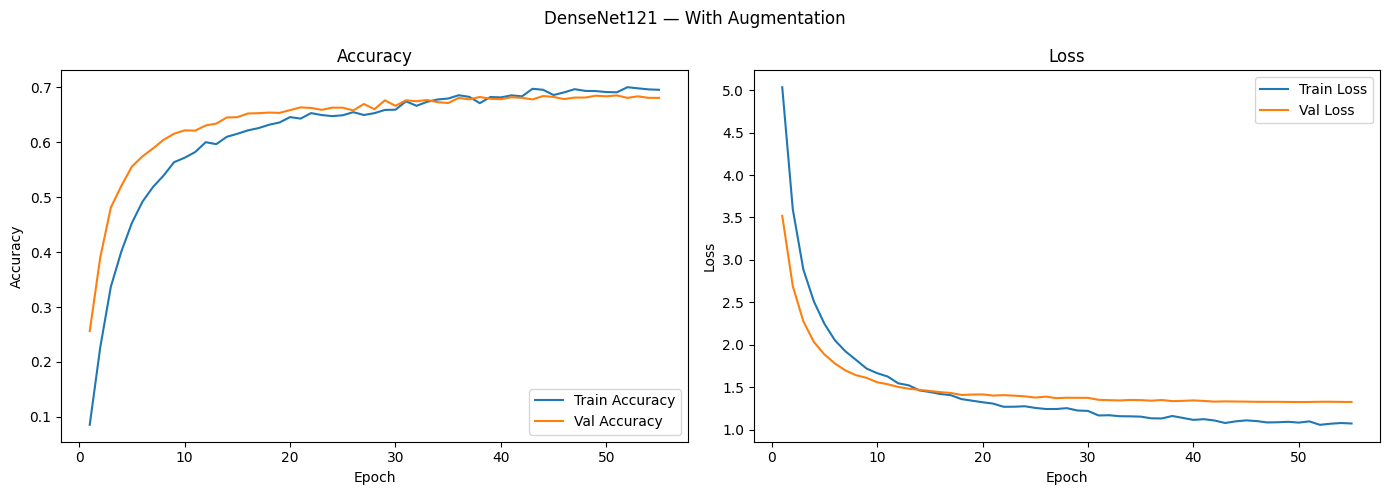

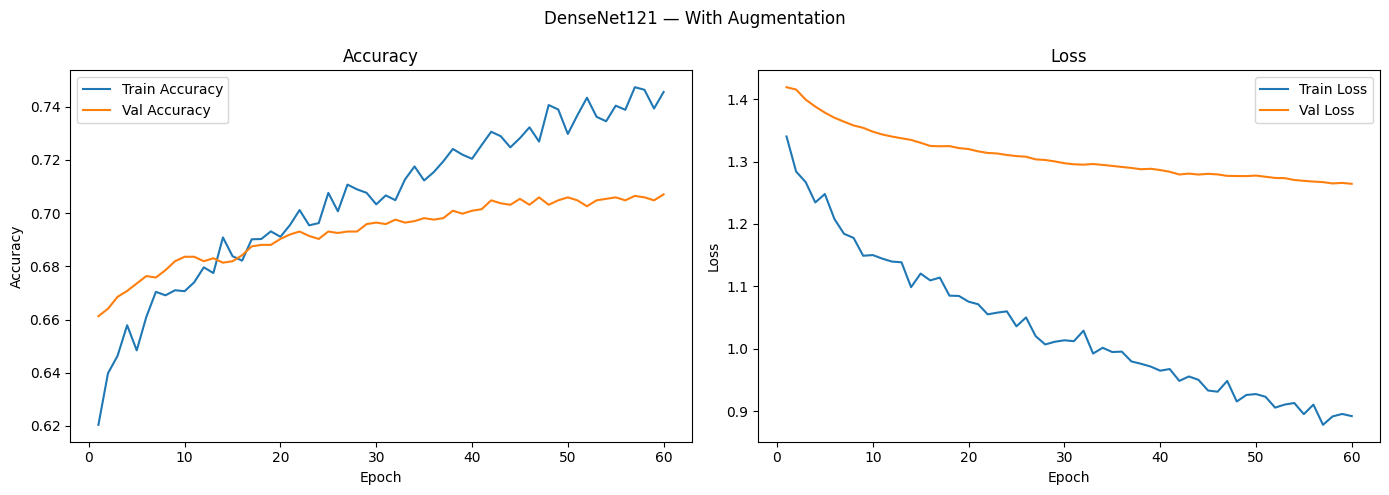

In [ ]:
def plot_training(history, label):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc)+1)

    plt.figure(figsize=(14, 5))
    plt.suptitle(f"DenseNet121 — {label}")

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Train Accuracy')
    plt.plot(epochs, val_acc, label='Val Accuracy')
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Train Loss')
    plt.plot(epochs, val_loss, label='Val Loss')
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot
plot_training(history_baseline_model_with_aug, "Baseline With Augmentation")
plot_training(history_finetuned_model_with_aug, "Fine tuned With Augmentation")

F1-score

In [ ]:
from sklearn.metrics import f1_score
import numpy as np

def evaluate_f1_macro(model, test_dataset, name=""):
    y_true = []
    y_pred = []

    for images, labels in test_dataset:
        preds = model.predict(images)
        y_true.extend(np.argmax(labels.numpy(), axis=1))
        y_pred.extend(np.argmax(preds, axis=1))

    f1_macro = f1_score(y_true, y_pred, average='macro')
    print(f"🎯 Macro F1-score {name}: {f1_macro:.4f}")
    return f1_macro


In [ ]:
model_baseline_aug = load_model("baseline_model_with_aug.keras")

f1_baseline_aug = evaluate_f1_macro(model_baseline_aug, test_densenet121, "Baseline With Augmentation")

f1_ft_aug = evaluate_f1_macro(finetuned_model_with_aug, test_densenet121, "Fine-tuned With Augmentation")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 696ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 685ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 694ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 690ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 692ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

# ConvNeXtBase

In [ ]:
# n_classes = len()

In [71]:
train_rodrigo = keras.utils.image_dataset_from_directory(
    directory = train_path,
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(224,224),
    color_mode="rgb",
    shuffle=True,
    interpolation = "bilinear"
)

validation_rodrigo = keras.utils.image_dataset_from_directory(
    directory = valid_path,
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(224,224),
    color_mode="rgb",
    shuffle=False,
    interpolation = "bilinear"
)

test_rodrigo = keras.utils.image_dataset_from_directory(
    directory = test_path,
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(224,224),
    color_mode="rgb",
    shuffle=False,
    interpolation = "bilinear"
)

Found 8388 files belonging to 202 classes.
Found 1797 files belonging to 202 classes.
Found 1798 files belonging to 202 classes.


In [ ]:
# import tensorflow as tf

# def load_image(path, label):
#     image = tf.io.read_file(path)
#     image = tf.image.decode_jpeg(image, channels=3)
#     image = tf.image.resize(image, [224, 224])
#     image = tf.cast(image, tf.float32) / 255.0  # normalização
#     return image, label



In [ ]:
# rotation = tf.keras.layers.RandomRotation(0.2)
# zoom = tf.keras.layers.RandomZoom(0.2)
# flip = tf.keras.layers.RandomFlip("horizontal")
# contrast = tf.keras.layers.RandomContrast(0.2)
# translation = tf.keras.layers.RandomTranslation(0.1, 0.1)

# def augment33(image, label):
#     image = flip(image)
#     image = contrast(image)
#     image = tf.image.random_brightness(image, max_delta=0.1)
#     image = tf.image.random_saturation(image, 0.8, 1.2)
#     image = tf.image.random_hue(image, 0.05)
#     image = rotation(image)
#     image = zoom(image)
#     image = translation(image)
#     return image, label

In [77]:
# Normalização
normalization = tf.keras.layers.Rescaling(1./255)

# Aumentação
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomTranslation(0.1, 0.1),
    tf.keras.layers.Lambda(lambda x: tf.image.random_brightness(x, max_delta=0.1)),
    tf.keras.layers.Lambda(lambda x: tf.image.random_saturation(x, 0.8, 1.2)),
    tf.keras.layers.Lambda(lambda x: tf.image.random_hue(x, 0.05)),
])

# Apply only to train
train_rodrigo = train_rodrigo.map(lambda x, y: (data_augmentation(normalization(x)), y))
validation_rodrigo = validation_rodrigo.map(lambda x, y: (normalization(x), y))
test_rodrigo = test_rodrigo.map(lambda x, y: (normalization(x), y))

# Optional: prefetch
AUTOTUNE = tf.data.AUTOTUNE
train_rodrigo = train_rodrigo.prefetch(AUTOTUNE)
validation_rodrigo = validation_rodrigo.prefetch(AUTOTUNE)
test_rodrigo = test_rodrigo.prefetch(AUTOTUNE)


In [79]:
# BATCH_SIZE = 32
# AUTOTUNE = tf.data.AUTOTUNE

# # Dataset de treino com shuffle antes do augmentation
# base_train_ds33 = tf.data.Dataset.from_tensor_slices((train_rodrigo["file_path"].values, train_rodrigo["label"].values))
# base_train_ds33 = base_train_ds33.shuffle(buffer_size=1000)
# base_train_ds33 = base_train_ds33.map(load_image, num_parallel_calls=AUTOTUNE)
# base_train_ds33 = base_train_ds33.map(augment33, num_parallel_calls=AUTOTUNE)
# base_train_ds33 = base_train_ds33.prefetch(AUTOTUNE)

# # Dataset de validação
# base_val_ds33 = tf.data.Dataset.from_tensor_slices((validation_rodrigo["file_path"].values, validation_rodrigo["label"].values))
# base_val_ds33 = base_val_ds33.map(load_image, num_parallel_calls=AUTOTUNE).prefetch(AUTOTUNE)

# # Versões batched (mesmo tamanho nos dois)
# train_ds33 = base_train_ds33.batch(BATCH_SIZE)
# val_ds33 = base_val_ds33.batch(BATCH_SIZE)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import os

# Diretório local para guardar os modelos
checkpoint_dir = os.path.join(os.getcwd(), "checkpoints")
os.makedirs(checkpoint_dir, exist_ok=True)

callbacks_finetune_model33 = [
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6, verbose=1),
    EarlyStopping(monitor="val_loss", patience=8, restore_best_weights=True, verbose=1),
    ModelCheckpoint(
        filepath=os.path.join(checkpoint_dir, "final_model_finetune.keras"),
        save_best_only=True,
        monitor="val_loss",
        verbose=1,
    ),
]

callbacks_head_model33 = [
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6, verbose=1),
    EarlyStopping(monitor="val_loss", patience=8, restore_best_weights=True, verbose=1),
    ModelCheckpoint(
        filepath=os.path.join(checkpoint_dir, "final_model_head.keras"),
        save_best_only=True,
        monitor="val_loss",
        verbose=1,
    ),
]


In [ ]:
from tensorflow.keras.applications import ConvNeXtBase
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization, Input
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2

# 1. Modelo base
base_model33 = ConvNeXtBase(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)
base_model33.trainable = False

# 2. Head
inputs = Input(shape=(224, 224, 3))
x = base_model33(inputs, training=False)
x = GlobalAveragePooling2D()(x)

x = Dense(1024, activation="gelu", kernel_regularizer=l2(0.002))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # antes 0.7

x = Dense(512, activation="gelu", kernel_regularizer=l2(0.002))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # antes 0.7

output = Dense(n_classes, activation="softmax")(x)

model33 = Model(inputs=inputs, outputs=output)

# 3. Compilar
model33.compile(
    optimizer=AdamW(learning_rate=1e-4, weight_decay=3e-4),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"]
)

# 4. Treinar head
history_model33_head = model33.fit(
    train_rodrigo,
    validation_data=validation_rodrigo,
    epochs=30,
    callbacks=callbacks_head_model33
)

# unfreeze all
for layer in base_model33.layers:
    layer.trainable = True

# Recompilar com LR mais alto
model33.compile(
    optimizer=AdamW(learning_rate=1e-5, weight_decay=3e-4),  # antes 5e-6
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"]
)

# Treinar fine-tuning
history_model33_finetuned = model33.fit(
    train_rodrigo,
    validation_data=validation_rodrigo,
    epochs=12,
    callbacks=callbacks_finetune_model33
)


Epoch 1/30
  9/300 ━━━━━━━━━━━━━━━━━━━━ 52:47 11s/step - accuracy: 0.0013 - loss: 10.2395  

KeyboardInterrupt: 